In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

# Load Datasets

We load the preprocessed datasets. To load our token-list as string, we use the `literal_eval` converter and parse the date columns. Make sure to run the previous notebooks first, so the files are present.

## media articles

In [75]:
df_media = pd.read_csv('../data/cleantech-media.csv', converters={"token_content": literal_eval}, parse_dates=['date'])
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9588 entries, 0 to 9587
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          9588 non-null   object        
 1   date           9588 non-null   datetime64[ns]
 2   author         31 non-null     object        
 3   content        9588 non-null   object        
 4   domain         9588 non-null   object        
 5   url            9588 non-null   object        
 6   token_content  9588 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 524.5+ KB


In [43]:
df_media.head(5)

,title,date,author,content,domain,url,token_content
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,Qatar Petroleum ( QP) is targeting aggressive ...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, target, aggress, cut, g..."
1,India Launches Its First 700 MW PHWR,2021-01-15,NaN,Nuclear Power Corp. of India Ltd. ( NPCIL) syn...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, india, ltd, npcil, sync..."
2,New Chapter for US-China Energy Trade,2021-01-20,NaN,New US President Joe Biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, us, presid, joe, biden, take, offic, wee..."
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,The slow pace of Japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[slow, pace, japanes, reactor, restart, contin..."
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,Two of New York City's largest pension funds s...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[two, new, york, citi, larg, pension, fund, sa..."


## patents

In [76]:
df_patents = pd.read_csv('../data/google_patents.csv', converters={"token_content": literal_eval}, parse_dates=['publication_date'])
df_patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13297 entries, 0 to 13296
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   publication_number  13297 non-null  object        
 1   application_number  13297 non-null  object        
 2   country_code        13297 non-null  object        
 3   publication_date    13297 non-null  datetime64[ns]
 4   inventor            13297 non-null  object        
 5   title               13297 non-null  object        
 6   title_lang          13297 non-null  object        
 7   abstract            13297 non-null  object        
 8   abstract_lang       13297 non-null  object        
 9   token_content       13297 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.0+ MB


In [45]:
df_patents.head()

,publication_number,application_number,country_code,publication_date,inventor,title,title_lang,abstract,abstract_lang,token_content
0,US-2022239235-A1,US-202217717397-A,US,2022-07-28,[],Adaptable DC-AC Inverter Drive System and Oper...,en,Disclosed is an adaptable DC-AC inverter syste...,en,"[disclos, adapt, dc, ac, invert, system, oper,..."
1,US-2022239251-A1,US-202217580956-A,US,2022-07-28,[],System for providing the energy from a single ...,en,"In accordance with an example embodiment, a so...",en,"[accord, exampl, embodi, solar, energi, system..."
2,EP-4033090-A1,EP-21152924-A,EP,2022-07-27,"['Schaper, Ulf', 'von Aswege, Enno', 'Gerke Fu...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de,"[verfahren, zum, steuern, einer, windenergiean..."
3,US-11396827-B2,US-202117606042-A,US,2022-07-26,[],Control method for optimizing solar-to-power e...,en,A control method for optimizing a solar-to-pow...,en,"[control, method, optim, solar, power, effici,..."
4,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,en,本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法，属于含盐废水低碳处理领...,zh,"[本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法, 属于含盐废水低碳处..."


# Exploration

First we inspect some basic characteristics of our datasets.

## Text length

In [46]:
# add text length
df_media['text_length'] = df_media['content'].astype(str).apply(len)
df_patents['text_length'] = df_patents['abstract'].astype(str).apply(len)

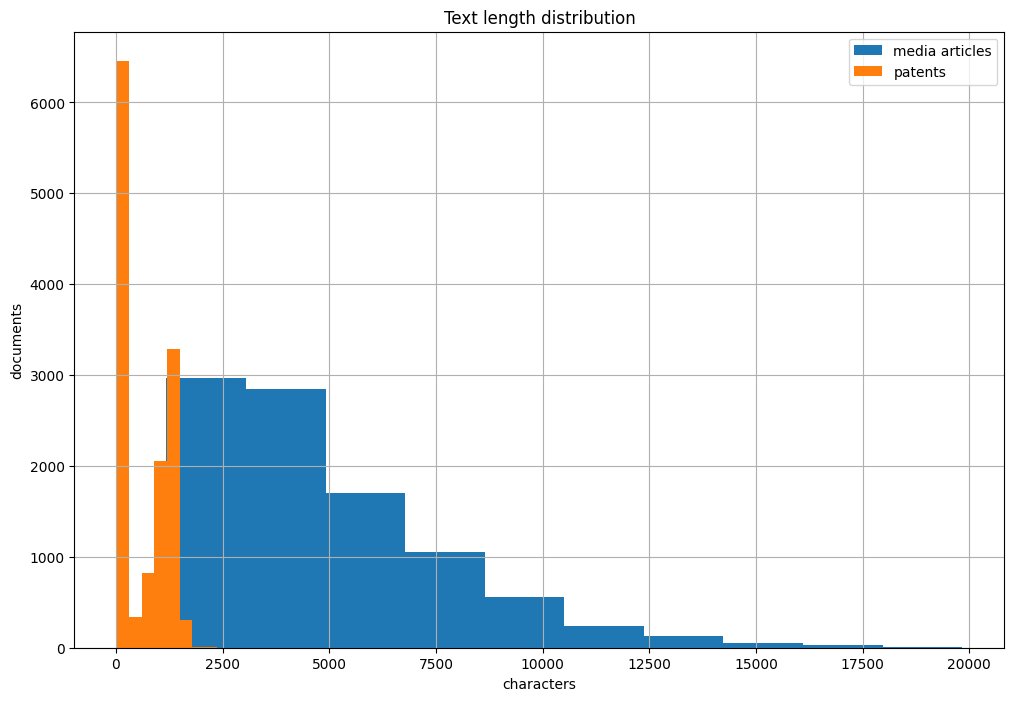

In [71]:
df_media.text_length.hist(label='media articles', figsize=(12,8))
df_patents.text_length.hist(label='patents')

plt.legend()
plt.xlabel('characters')
plt.ylabel('documents')
plt.title('Text length distribution');

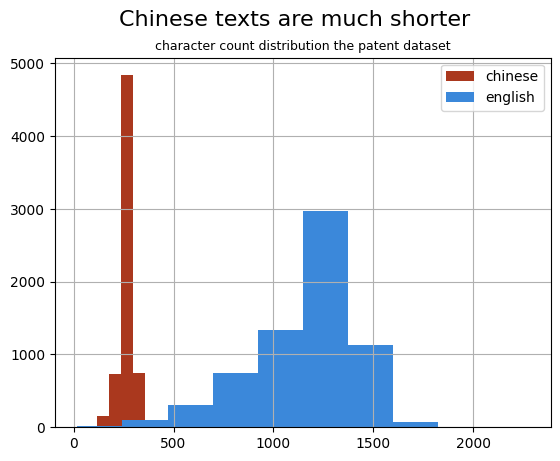

In [73]:
# Mind the language differences
df_patents[df_patents.abstract_lang == 'zh'].text_length.hist(label='chinese', color = "#aa381e")
df_patents[df_patents.abstract_lang == 'en'].text_length.hist(label='english', color = "#3B88DA")

plt.title('character count distribution the patent dataset', fontsize=9)
plt.suptitle('Chinese texts are much shorter', fontsize=16)
plt.legend();

## Number of tokens

In [51]:
# add simple token count
df_media['num_tokens'] = df_media['token_content'].apply(lambda x: len(x))
df_patents['num_tokens'] = df_patents['token_content'].apply(lambda x: len(x))

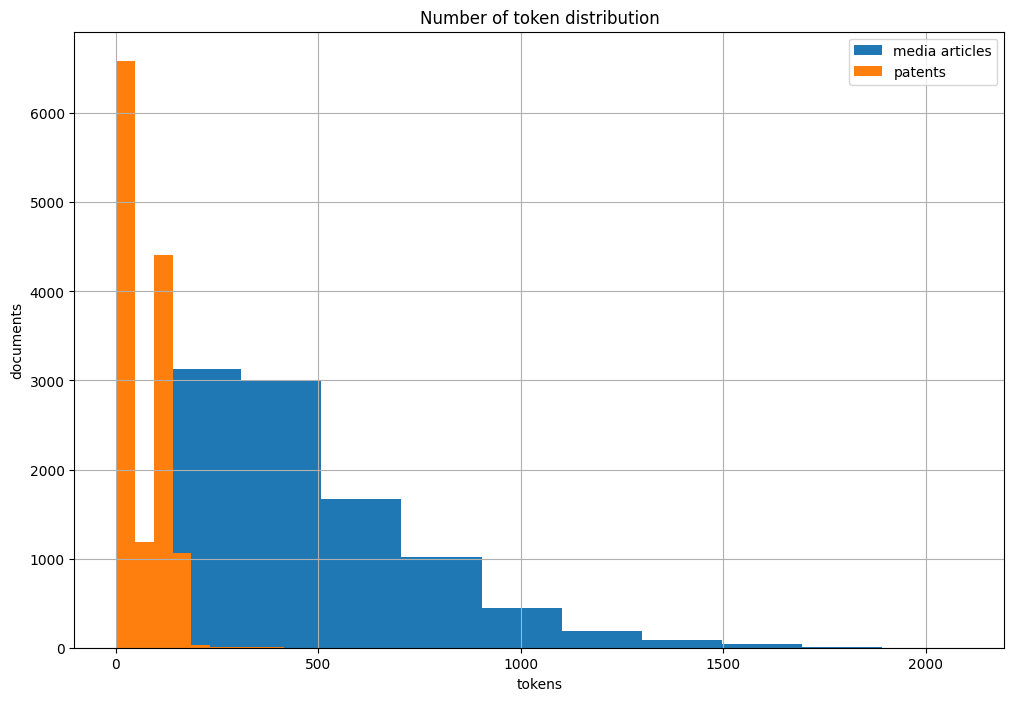

In [74]:
df_media.num_tokens.hist(label='media articles', figsize=(12,8))
df_patents.num_tokens.hist(label='patents')

plt.legend()
plt.xlabel('tokens')
plt.ylabel('documents')
plt.title('Number of token distribution');

## Sentiment

In [10]:
## TODO

## Word Clouds

As we already have tokenised and preprocessed our texts, we can us this as basis for the word cloud.

In [59]:
df_media[:2].token_content.apply(lambda x: ' '.join(x)).str.cat()

'qatar petroleum qp target aggress cut greenhous ga emiss prepar launch phase 2 plan 48 million ton per year lng expans late sustain report publish wednesday qp say goal includ reduc emiss intens qatar lng facil 25 upstream facil least 15 compani also aim reduc ga flare intens across upstream facil 75 rais carbon captur storag ambit 5 million ton yr 7 million ton yr 2027 2 2 million ton yr carbon captur goal come 32 million ton yr phase 1 lng expans also know north field east project 1 1 million ton yr come phase 2 known north field south project rais qatar lng capac 16 million ton yr qatar current lng product capac around 78 million ton yr eye phase expans 126 million ton yr qp say abl elimin routin ga flare 2030 methan emiss limit set methan intens target 0 2 across facil 2025 compani also plan build 1 6 gigawatt solar energi capac 2025 half come siraj solar power project next year eif jan 22 20 month littl news phase 2 qatar massiv lng expans mcdermott intern say last week award fro

In [69]:
# generate the word clouds
wordcloud_media = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10, colormap='Blues').generate(df_media.token_content.apply(lambda x: ' '.join(x)).str.cat())
 
wordcloud_patents = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10, colormap='Oranges').generate(df_patents.token_content.apply(lambda x: ' '.join(x)).str.cat())

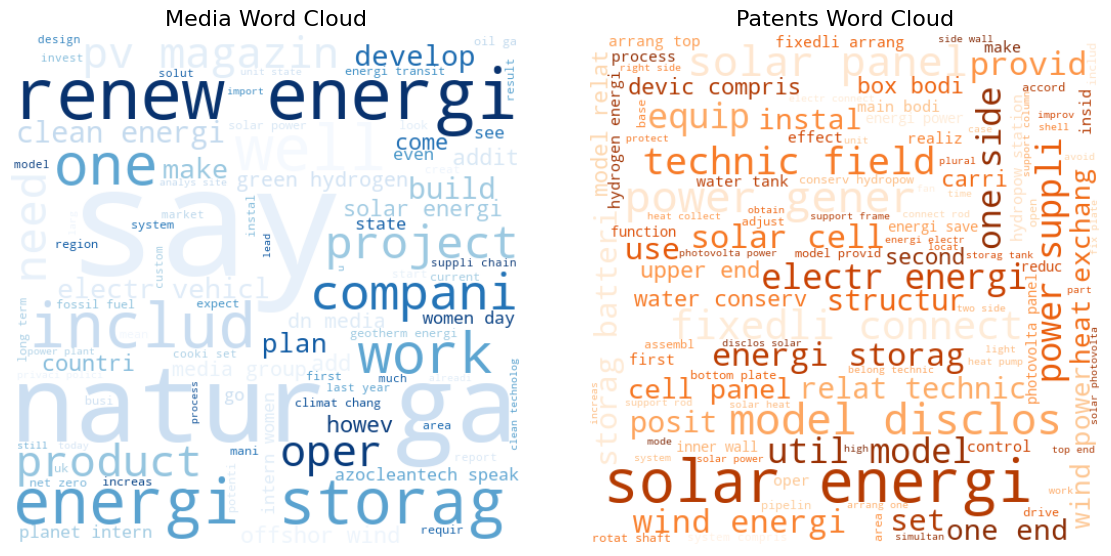

In [70]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=None)

# Plot the first word cloud (media)
axs[0].imshow(wordcloud_media, interpolation='bilinear')
axs[0].set_title('Media Word Cloud', fontsize=16)
axs[0].axis("off")

# Plot the second word cloud (patents)
axs[1].imshow(wordcloud_patents, interpolation='bilinear')
axs[1].set_title('Patents Word Cloud', fontsize=16)
axs[1].axis("off")

plt.tight_layout(pad=3)
plt.show()

## Timeline

As the data come with (pubication-)dates, we can plot these in a timeline.

In [107]:
def make_timeline(df_plot, title = 'timeline', palette='Blues'):
    
    # Create new columns for week number and year
    df_plot['week_number'] = df_plot['date'].dt.isocalendar().week
    df_plot['year'] = df_plot['date'].dt.year
    
    # Group the DataFrame by week number and year, and count the records
    week_year_counts = df_plot.groupby(['year', 'week_number']).size().reset_index(name='record_count')
    
    # Reshape the DataFrame to have weeks as rows and years as columns
    heatmap_data = week_year_counts.pivot(index="year", columns="week_number", values="record_count")
    
    # Replace NaN values with zeros
    heatmap_data = heatmap_data.fillna(0)
    
    # Plot the heatmap using Seaborn
    plt.figure(figsize=(30, 5))
    sns.heatmap(heatmap_data, cmap=palette, annot=True, fmt=".0f", linewidths=.5)
    plt.title(title)
    plt.ylabel('Year')
    plt.xlabel('Week Number')
    plt.show()

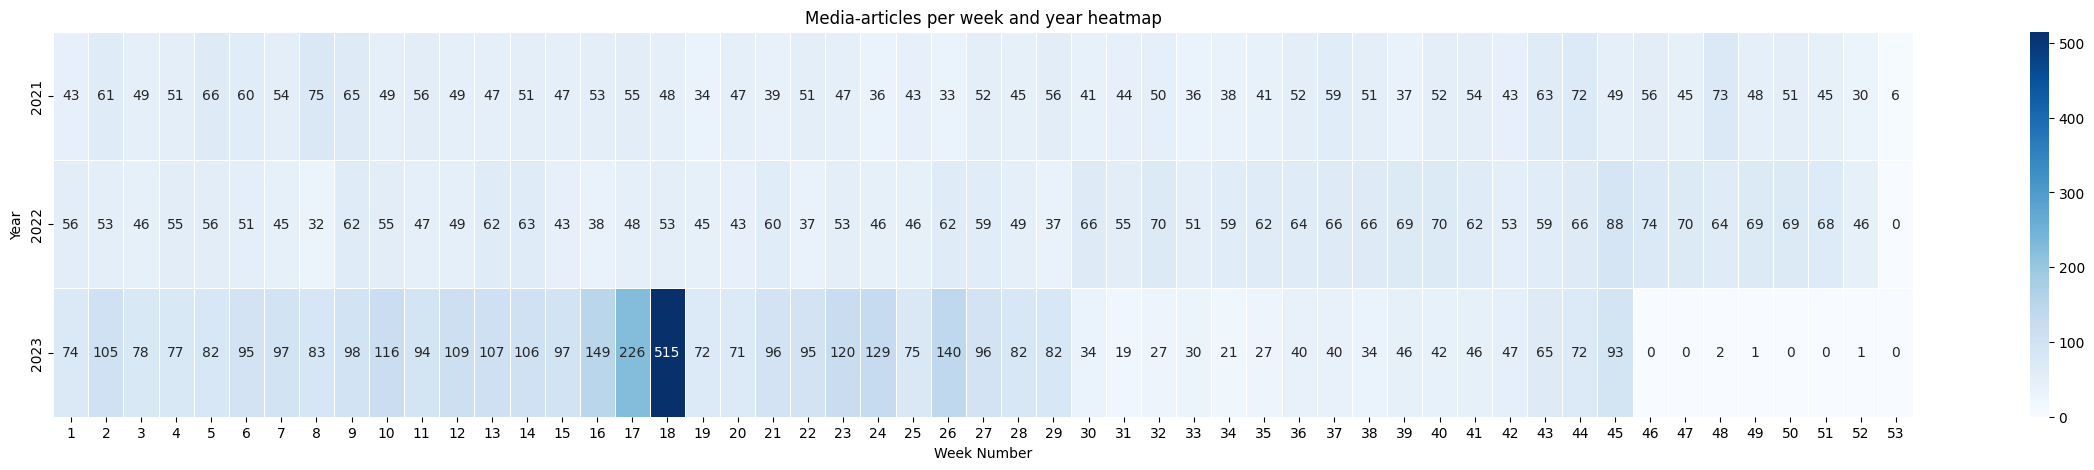

In [112]:
make_timeline(df_media.copy()[['date']], title='Media-articles per week and year heatmap')

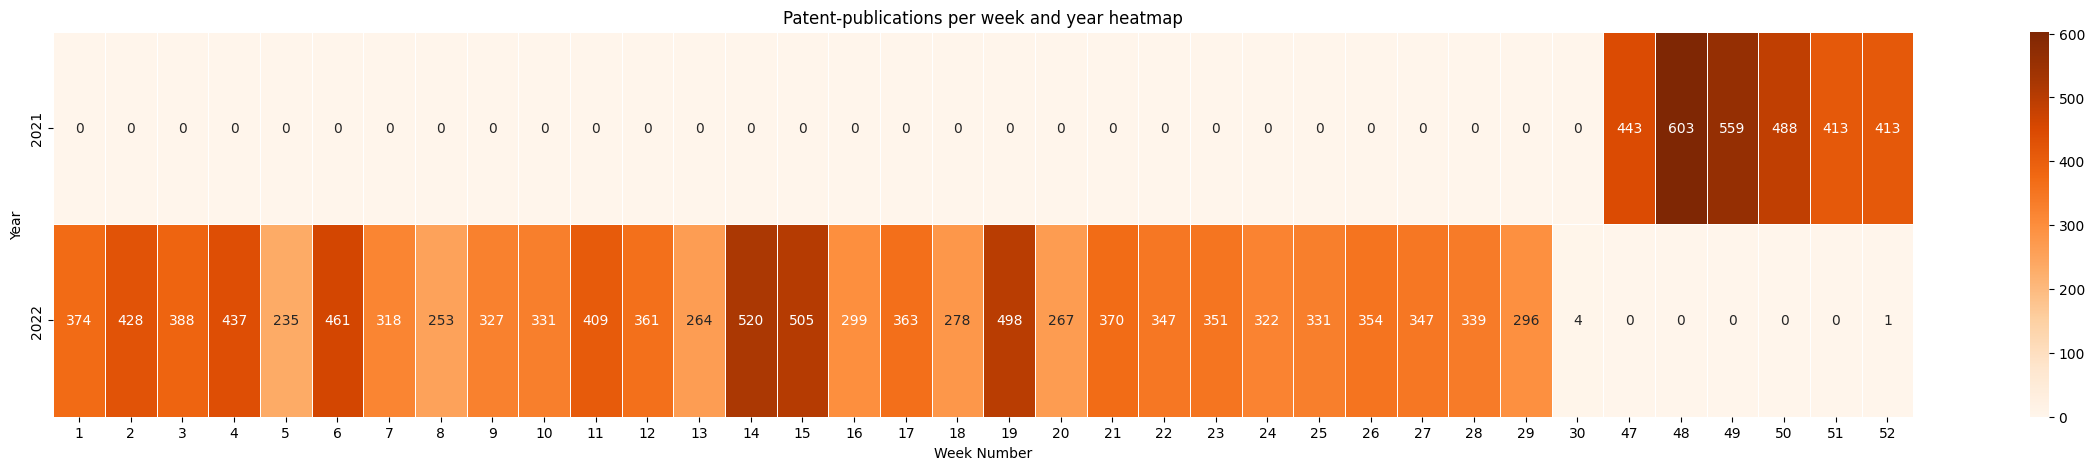

In [113]:
make_timeline(
    df_patents.copy()[['publication_date']].rename(columns={'publication_date': 'date'}), 
    title='Patent-publications per week and year heatmap', 
    palette='Oranges')

# N-Gramming